# HeidelbergCement CASE STUDY

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory analysis

### Import of data and libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

path = "C:/Users/HP/OneDrive/Documents/Python Anaconda/Heidelberg Cement"
os.chdir(path)

data = pd.read_excel('interview_dataset.xlsx', sheet_name='Sheet1')
data.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_18,X_19,y_0,y_1,y_2,y_3,y_4,y_5,X_26,X_28
0,1.81,NaN,0.00,0.00,0.00,0.00,0.00,0.49,0.15,2.86,...,NaN,NaN,59.3,60.1,60.3,61.4,59.8,59.7,2012-02-14 10:00:00,0---200
1,2.64,0.87,20.24,4.93,3.04,65.02,1.28,0.59,0.13,2.73,...,7.3,8.3,49.3,48.4,48.6,48.4,48.7,50.9,2012-04-02 10:00:00,0---200
2,2.77,0.95,0.00,0.00,0.00,0.00,0.00,0.42,0.13,2.70,...,7.4,7.7,47.6,47.4,48.2,47.0,48.3,47.1,2012-04-03 10:00:00,0---200
3,2.70,0.88,0.00,0.00,0.00,0.00,0.00,0.60,0.14,2.68,...,8.0,7.4,47.3,47.5,48.8,47.8,48.1,47.8,2012-04-10 10:00:00,0---200
4,2.67,1.02,0.00,0.00,0.00,0.00,0.00,0.59,0.14,2.74,...,7.6,7.9,51.2,49.7,51.0,48.6,50.9,50.4,2012-04-11 10:00:00,0---200


## Summary

In [35]:
data.describe()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_16,X_17,X_18,X_19,y_0,y_1,y_2,y_3,y_4,y_5
count,4002.000000,8495.000000,8054.000000,8054.000000,8054.000000,8054.000000,8054.000000,8500.000000,8500.000000,8500.000000,...,8490.000000,4179.000000,8490.000000,8495.000000,8459.000000,8459.000000,8459.000000,8458.000000,8458.000000,8458.000000
mean,5.362351,0.494819,29.396692,29.412113,28.714113,24.888622,11.082288,0.636089,0.168848,2.817500,...,55.202273,6.442402,5.101873,7.519882,56.697115,56.716669,56.714316,56.783471,56.665642,56.701289
std,2.430134,0.302909,42.462445,42.671716,42.720091,33.306719,17.309875,0.222255,0.073127,0.149969,...,11.888348,2.411407,1.361524,1.802390,6.364591,6.343017,6.387708,9.366963,6.402062,8.409899
min,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480000,...,0.000000,0.000000,0.000000,0.000000,38.000000,36.700000,38.800000,38.100000,38.200000,34.600000
25%,2.320000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,0.130000,2.710000,...,52.500000,4.600000,4.400000,6.600000,52.500000,52.600000,52.500000,52.600000,52.400000,52.300000
50%,6.650000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.140000,2.800000,...,57.000000,6.600000,5.200000,7.600000,56.900000,57.000000,57.000000,57.000000,56.900000,56.900000
75%,7.190000,0.680000,92.100000,92.130000,91.360000,53.067500,16.942500,0.770000,0.210000,2.910000,...,64.900000,8.200000,5.900000,8.700000,59.000000,59.000000,59.000000,59.100000,59.000000,59.000000
max,8.660000,2.460000,99.010000,103.240000,96.880000,91.840000,59.050000,1.120000,0.360000,3.700000,...,73.600000,13.500000,11.700000,14.100000,77.400000,77.000000,77.300000,689.000000,76.500000,557.000000


## Missing values

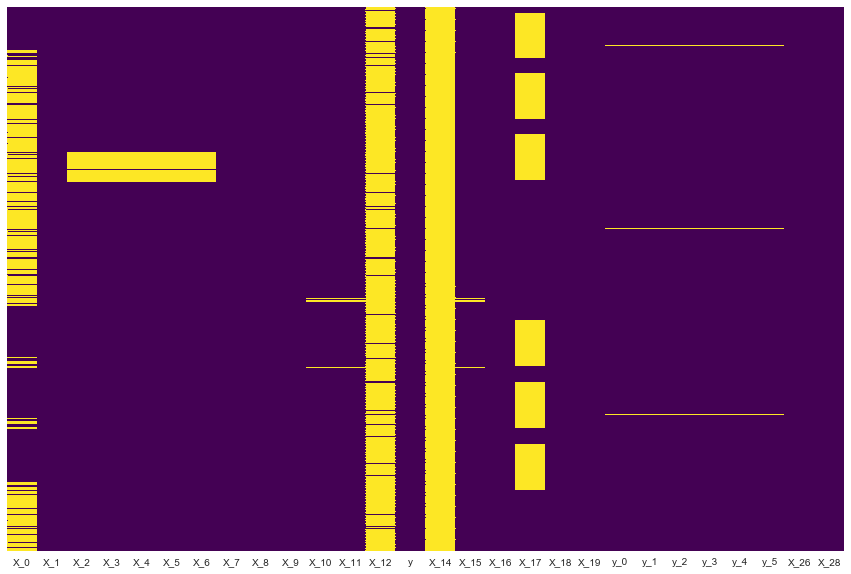

In [36]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

## Data correlation

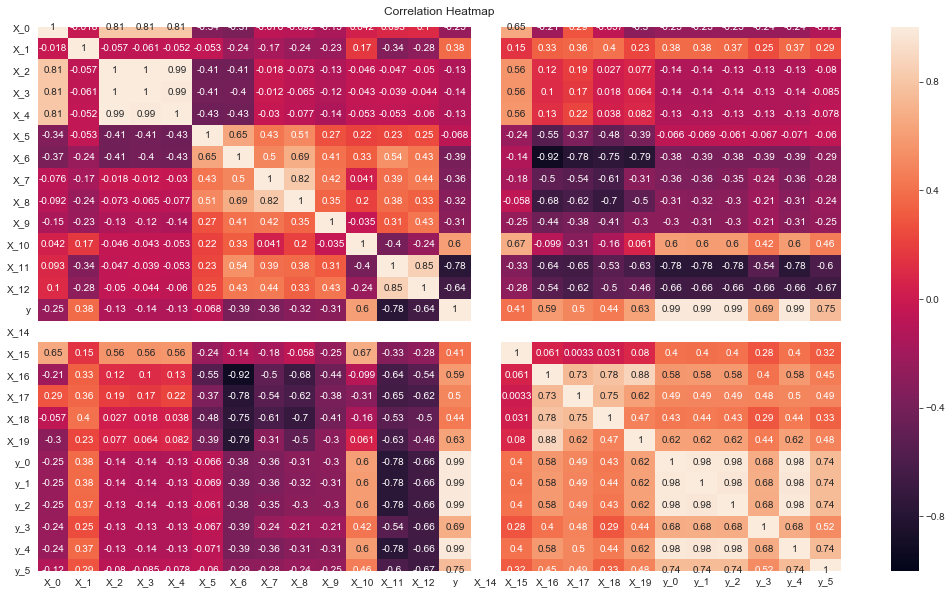

In [58]:
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## Distribution

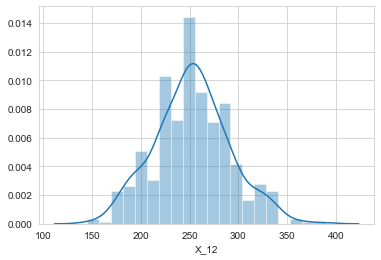

In [14]:
sns.set_style('whitegrid') # selecting a particular variable
sns.distplot(data['X_12'], bins=20) # CHANGE
plt.show()

# Feature engineering

In [15]:
print(data['X_26'].value_counts()) # X_26 separate time and date
data['time'] = pd.to_datetime(data['X_26'], format='%Y:%M:%D').dt.time
data['date'] = pd.to_datetime(data['X_26'], format='%Y:%M:%D').dt.date
data = data.drop('X_26', 1)

2013-05-27 10:00:00    9
2012-11-26 10:00:00    9
2014-09-30 10:00:00    9
2012-04-02 10:00:00    9
2014-01-08 10:00:00    9
                      ..
2017-01-11 10:46:00    1
2017-09-04 08:15:00    1
2016-02-29 07:55:00    1
2015-04-20 13:01:00    1
2018-04-03 08:34:00    1
Name: X_26, Length: 3885, dtype: int64


In [16]:
import plotly.express as px # material strength over time
fig = px.scatter(data, x='date', y='y',
                 title="Material strength (y) through the time",
                 template="simple_white")
fig.show()

In [17]:
print(data['X_28'].value_counts()) # X_28 from a string into two categories
data[['X_28','X_29']] = data.X_28.str.split("---",expand=True,)
data = data[['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       'X_10', 'X_11', 'X_12', 'y', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'date',  'time', 'X_28',
       'X_29']]

6---200    975
7---200    966
2---250    966
5---200    966
1---200    966
3---150    964
4---200    964
8---150    924
0---200    809
Name: X_28, dtype: int64


In [18]:
import plotly.express as px # separation of trends based on one category
fig = px.scatter(data, x='date', y='y', facet_row="X_29",
                 title="Material strength (y) through the time",
                 template="simple_white")
fig.show()

In [19]:
import plotly.express as px # separation of trends based on one category
fig = px.scatter(data, x='date', y='y', facet_col="X_29",
                 title="Material strength (y) through the time",
                 template="simple_white")
fig.show()

In [20]:
print(data['X_14'].value_counts()) # X_14 deleting of a column with NAs only
data = data.drop('X_14', 1)

Series([], Name: X_14, dtype: int64)


In [21]:
print(data['X_12'].value_counts()) # X_12 simple linear regression for imputation
X_12 = data[['X_11', 'X_12']]
X_12 = X_12.dropna(how = 'any')

from sklearn.model_selection import train_test_split
X = X_12[['X_11']]
y = X_12['X_12']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1001)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression() # linear regression for getting the coeficient
model.fit(X_train,y_train)
coefficient = pd.DataFrame(model.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient = pd.DataFrame(coefficient)

coef = round(coefficient['Coefficient'][0],4)
inter = round(model.intercept_,4)
y_pred = model.predict(X_test)
print('Coefficient: ', round(coefficient['Coefficient'][0],4))
print('Intercept: ', round(model.intercept_,4))
print('Mean absolute error: ',round(mean_absolute_error(y_test, y_pred),4))

250.0    39
260.0    38
240.0    32
225.0    29
270.0    29
255.0    28
245.0    27
280.0    23
220.0    22
265.0    22
285.0    17
275.0    17
230.0    16
200.0    15
235.0    15
300.0    15
215.0    15
290.0    15
320.0    13
295.0    12
195.0    11
190.0     9
185.0     8
310.0     8
180.0     7
205.0     7
335.0     6
340.0     6
210.0     5
325.0     5
175.0     4
170.0     4
330.0     3
315.0     2
355.0     1
360.0     1
145.0     1
390.0     1
305.0     1
160.0     1
370.0     1
155.0     1
Name: X_12, dtype: int64
Coefficient:  1.1044
Intercept:  25.9863
Mean absolute error:  15.8969


In [22]:
def impute_X_12(cols): # imputation with help of the coefficient
    X_11 = cols[0]
    X_12 = cols[1]

    if pd.isnull(X_12):
        return X_11 * coef
    else:
        return X_12

data['X_12'] = round(data[['X_11','X_12']].apply(impute_X_12, axis=1),1)
print(data['X_12'].count())

8457


In [23]:
print(data['X_0'].value_counts()) # X_0 deleting of a column with lot of NAs
data = data.drop('X_0', 1)

2.09    34
2.16    33
6.89    33
6.81    33
6.75    32
        ..
8.31     1
6.14     1
5.91     1
5.37     1
5.53     1
Name: X_0, Length: 440, dtype: int64


In [24]:
print(data['X_17'].value_counts()) # X_17 mean imputation
mean = data['X_17'].mean()
mean

def impute_X_17(cols):
    X_17 = cols[0]

    if pd.isnull(X_17):
        return mean
    else:
        return X_17

data['X_17'] = round(data[['X_17']].apply(impute_X_17, axis=1),1)
print(data['X_17'].count())

8.1     81
7.9     76
8.2     74
8.7     71
8.0     69
        ..
13.5     1
0.5      1
0.9      1
13.4     1
13.3     1
Name: X_17, Length: 127, dtype: int64
8500


In [25]:
data['X_2'].value_counts() # REST of NAs deleted
data = data.dropna()
data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,y_0,y_1,y_2,y_3,y_4,y_5,date,time,X_28,X_29
1,0.87,20.24,4.93,3.04,65.02,1.28,0.59,0.13,2.73,25.0,...,49.3,48.4,48.6,48.4,48.7,50.9,2012-04-02,10:00:00,0,200
2,0.95,0.00,0.00,0.00,0.00,0.00,0.42,0.13,2.70,26.0,...,47.6,47.4,48.2,47.0,48.3,47.1,2012-04-03,10:00:00,0,200
3,0.88,0.00,0.00,0.00,0.00,0.00,0.60,0.14,2.68,25.0,...,47.3,47.5,48.8,47.8,48.1,47.8,2012-04-10,10:00:00,0,200
4,1.02,0.00,0.00,0.00,0.00,0.00,0.59,0.14,2.74,25.0,...,51.2,49.7,51.0,48.6,50.9,50.4,2012-04-11,10:00:00,0,200
5,0.94,0.00,0.00,0.00,0.00,0.00,0.63,0.14,2.63,25.0,...,48.5,48.1,48.1,48.0,48.6,47.4,2012-04-16,10:00:00,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,0.20,0.00,0.00,0.00,50.47,53.29,1.02,0.29,3.05,31.0,...,46.6,46.4,44.3,42.6,42.6,40.0,2020-07-15,08:45:00,8,150
8496,0.50,0.00,0.00,0.00,49.92,54.74,1.05,0.30,3.06,31.0,...,45.1,44.2,43.6,44.3,44.6,43.6,2020-07-20,08:25:00,8,150
8497,0.26,0.00,0.00,0.00,50.52,54.95,1.06,0.29,3.19,31.0,...,46.1,42.1,44.5,43.1,42.6,42.6,2020-07-22,08:30:00,8,150
8498,0.26,0.00,0.00,0.00,49.75,54.81,1.12,0.30,3.16,31.0,...,45.7,45.8,46.4,46.5,47.2,46.8,2020-07-27,08:10:00,8,150


# Models

## Model1 - Multiple Linear Regression X

In [26]:
data.columns # splitting data into train and test set
df = data[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_28', 'X_29', 'y']]

from sklearn.model_selection import train_test_split
X = df[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_28', 'X_29']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [27]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression() # multiple linear regression model
model1.fit(X_train, y_train)
coefficient = pd.DataFrame(model1.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient = pd.DataFrame(coefficient)

y_pred = model1.predict(X_test)

outcome = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
outcome['difference'] = outcome['y_test'] - outcome['y_pred']
outcome['difference_percentage'] = round(outcome.difference/(outcome.y_test/100),6)
print('Percentage difference: ', round(outcome.difference_percentage.abs().mean(),2),'%')

coef = round(coefficient['Coefficient'][0],4)
inter = round(model1.intercept_,4)
y_pred = model1.predict(X_test)
print('Coefficients: ','\n', round(coefficient['Coefficient'],4))

print('Intercept: ', round(model1.intercept_,4))
print('Mean absolute error: ',round(mean_absolute_error(y_test, y_pred),4))

Percentage difference:  2.65 %
Coefficients:  
 X_1     0.2729
X_2    -0.0223
X_3     0.0287
X_4    -0.0155
X_5     0.0147
X_7    -2.2038
X_8     7.5746
X_9     0.4527
X_10    0.4633
X_11   -0.0269
X_12   -0.0032
X_15    0.0009
X_16    0.0533
X_17   -0.0615
X_18    0.4665
X_19    0.3095
X_28    0.0737
X_29    0.1180
Name: Coefficient, dtype: float64
Intercept:  13.9522
Mean absolute error:  1.4655


## Model2 - Multiple Linear Regression y

In [28]:
data.columns # splitting data into train and test set
df = data[['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y']]

from sklearn.model_selection import train_test_split
X = df[['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [29]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression() # multiple linear regression model
model2.fit(X_train, y_train)
coefficient = pd.DataFrame(model2.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient = pd.DataFrame(coefficient)

y_pred = model2.predict(X_test)

outcome = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
outcome['difference'] = outcome['y_test'] - outcome['y_pred']
outcome['difference_percentage'] = round(outcome.difference/(outcome.y_test/100),6)
print('Percentage difference: ', round(outcome.difference_percentage.abs().mean(),2),'%')

coef = round(coefficient['Coefficient'][0],4)
inter = round(model2.intercept_,4)
y_pred = model2.predict(X_test)
print('Coefficients: ','\n', round(coefficient['Coefficient'],4))

print('Intercept: ', round(model2.intercept_,4))
print('Mean absolute error: ',round(mean_absolute_error(y_test, y_pred),4))

Percentage difference:  0.14 %
Coefficients:  
 y_0    0.1676
y_1    0.1665
y_2    0.1672
y_3    0.1668
y_4    0.1659
y_5    0.1657
Name: Coefficient, dtype: float64
Intercept:  0.01
Mean absolute error:  0.0796


In [30]:
## Model3 - Random Forest Regression X

In [31]:
data.columns # splitting data into train and test set
df = data[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_28', 'X_29', 'y']]

from sklearn.model_selection import train_test_split
X = df[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_28', 'X_29']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=500, random_state=1001) # random forest regression model
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

outcome = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
outcome['difference'] = outcome['y_test'] - outcome['y_pred']
outcome['difference_percentage'] = round(outcome.difference/(outcome.y_test/100),6)
print('Percentage difference: ', round(outcome.difference_percentage.abs().mean(),2),'%')

print('Mean absolute error: ',round(mean_absolute_error(y_test, y_pred),4))

Percentage difference:  1.82 %
Mean absolute error:  1.0087


# Conclusion

### The random forest model performed the best out of the models that I tried: decision tree regression, multiple linear regression, SVM and ANN. The random forest does not take into consideration outliers and in comparison to the y model where is high linear dependency, performs very well.

### The Linear regression model of y shows really low mean absolute error because we try to estimate the mean out of the six measurements.